# Phase 3 Review

![review guy](https://media.giphy.com/media/3krrjoL0vHRaWqwU3k/giphy.gif)

# TOC 

1. [Gradient Descent](#grad_desc)
2. [Logistic Regression](#logistic)
3. [Confusion Matrix](#con_mat)
4. [Accuracy/Precision/Recall/F1](#more_metric)
5. [auc_roc](#auc_roc)
3. [Algos](#algos)

<a id='grad_desc'></a>

## Gradient Descent

### Question: What is a loss function? (Explain it in terms of the relationship between true and predicted values) 


#### your explanation here
loss function is the difference between the true and predicted values
- measures overall how our predictors are vs the true value

### Question: What loss functions do we know and what types of data work best with each?

#### your explanation here
- mean squared error - linear regression/ continuous variables
- log loss - logistic regression/ categorical binary

To solidify our knowledge of gradient descent, we will use Sklearn's stochastic gradient descent algorithm for regression [SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html#regression).   Sklearn classifiers share many methods and parameters, such as fit/predict, but some have useful additions.  SGDRegressor has a new method called partial_fit, which will allow us to inspect the calculated coefficients after each step of gradient descent.  

We will use the diabetes dataset for this task.  

In [42]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

data = load_diabetes(as_frame=True)
X = data['data']
y = data['target']

In [43]:
X.shape

(442, 10)

In [44]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [45]:
from sklearn.linear_model import SGDRegressor

In [46]:
# Instantiate a SGDRegressor object and run partial fit on X and y. For now, pass the argument `penalty=None`
sdgr = SGDRegressor(penalty=None)
sdgr.partial_fit(X, y)

SGDRegressor(penalty=None)

In [47]:
# Inspect the coefficient array
sdgr.coef_

array([ 0.44809271,  0.44673418,  2.49686566,  1.90867689,  0.78707356,
        0.62310001, -1.99092478,  2.19674652,  2.62207785,  1.73157249])

In [48]:
# Import mean_squared_error from metrics, and pass in the true ys, an array of predictions
# and the agrument squared = False
from sklearn.metrics import mean_squared_error
mean_squared_error(y, sdgr.predict(X), squared=False)

87.56362851319676

In [49]:
# Repeat the partial fit. Inspect, RMSE, coefficients.
sdgr.partial_fit(X, y)

SGDRegressor(penalty=None)

In [50]:
sdgr.coef_

array([ 1.04198986,  0.55319501,  4.34640189,  3.30364867,  1.43908494,
        1.15490971, -3.22219216,  3.51815388,  4.4020088 ,  2.92789019])

In [51]:
mean_squared_error(y, sdgr.predict(X), squared=False)

78.44156808976027

Pick a coefficient, and explain the gradient descent update.


Together, let's plot the trajectory of one coefficient against the loss. 

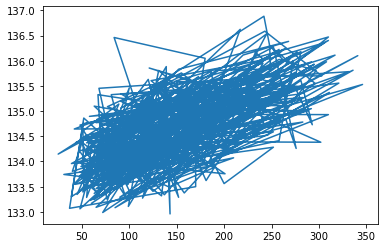

In [52]:
# code
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(y, sdgr.predict(X))

Compare that to a full fit of the SGDRegressor.

In [53]:
# code

<a id='logistic'></a>

# Logistic Regression and Modeling

What type of target do we feed the logistic regression model?

In [54]:
# your explanation here
#binary categorical 0 or 1

In [55]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']

In [56]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Question: What is the purpose of train/test split?  


#### your explanation here
the purpose of the train test split is to train part of the data and fit the model ont hat training data. 
we then use that fitted model and apply it to our test data and see how well our model performs on data it wasn't
trained on

### Question: Why should we never fit to the test portion of our dataset?

#### your explanation here
we dont fit our test part of the dataset because if we fit that part then thats just creating a model out of our end result- 

In [63]:
# Scale the training set using a standard scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [64]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [65]:
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
287,-0.349138,-1.438513,-0.411726,-0.390479,-1.863662,-1.268607,-0.826171,-0.952866,-1.729368,-0.941541,...,-0.542685,-1.655655,-0.589864,-0.525560,-1.510669,-0.891500,-0.750217,-0.916711,-0.925086,-0.808411
512,-0.204687,0.312640,-0.133673,-0.275880,1.078073,0.863546,0.726314,0.898441,1.178770,1.474377,...,0.041487,0.689899,0.194128,-0.051934,1.129415,0.923942,1.222217,1.436560,1.149559,1.569111
402,-0.329312,-0.215072,-0.317394,-0.364357,-1.579880,-0.457451,-0.597310,-0.764588,0.275343,-0.501024,...,-0.435901,-0.148985,-0.320159,-0.446032,-1.634396,-0.106752,-0.539891,-0.723713,0.534970,-0.619348
446,1.027403,2.089824,1.046922,0.917584,0.316303,0.562037,1.048527,0.930437,-0.325697,-0.477474,...,1.113515,2.165006,1.165793,0.997696,0.383604,0.860948,1.872819,1.310691,0.152884,0.421636
210,1.828969,0.696001,1.763681,1.783821,-0.333674,0.628175,0.974660,1.265740,-0.131572,-1.713139,...,1.471556,0.387568,1.556276,1.385595,-0.577759,0.296680,0.595768,1.232995,0.050452,-1.406351


### Question: Why is scaling our data important? For part of your answer, relate to one of the advantages of logistic regression over another classifier.

#### your explanation here
- scaling is important because some data will have a bigger impact than others. 
- in logistic regression model its important because ridge/lasso regularization to give it all equal weight
- easier to interperet 

In [67]:
# fit model with logistic regression to the appropriate portion of our dataset
from sklearn.linear_model import LogisticRegression

In [71]:
lr= LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Now that we have fit our classifier, the object `lr` has been filled up with information about the best fit parameters.  Take a look at the coefficients held in the `lr` object.  Interpret what their magnitudes mean.

In [72]:
# Inspect the .coef_ attribute of lr and interpret
lr.coef_
#these coefficients means

array([[-0.39751679, -0.41535774, -0.34832129, -0.45142016, -0.20791905,
         0.62039231, -0.73558933, -1.09376305,  0.23601875,  0.08357971,
        -1.28501592,  0.22136641, -0.58858571, -0.89527827, -0.19689721,
         0.63403697, -0.14135554, -0.40058728,  0.5262862 ,  0.73327971,
        -0.84378886, -1.29571675, -0.51790962, -0.82723207, -0.53895662,
         0.12288567, -1.00748469, -0.76642547, -1.21963558, -0.14580732]])

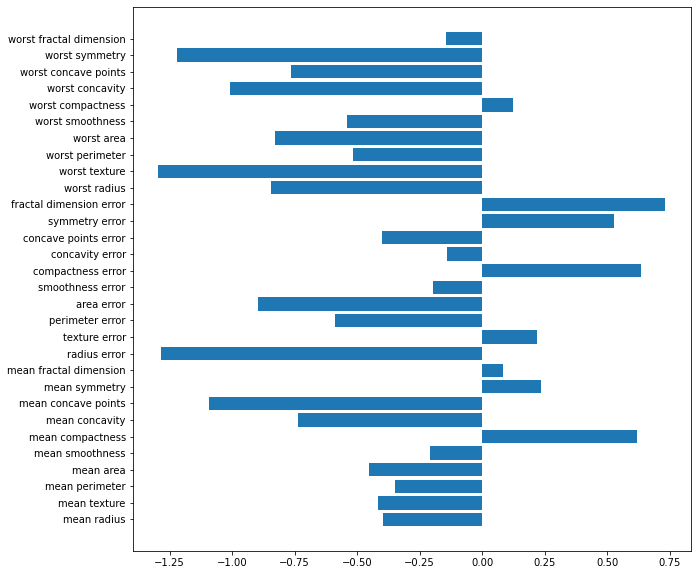

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(X.columns, lr.coef_[0])
ax.tick_params(axis='x')
#larger negative value - class 0 
#larger positive value more likely to predict class 1

Logistic regression has a predict method just like linear regression.  Use the predict method to generate a set of predictions (y_hat_train) for the training set.

In [76]:
# use predict to generate a set of predictions
y_hat_train = lr.predict(X_train_scaled)
y_hat_train

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

<a id='con_mat'></a>

### Confusion Matrix

Confusion matrices are a great way to visualize the performance of our classifiers. 

### Question: What does a good confusion matrix look like?

In [ ]:
# your explanation here
#numbers concentrated in the top left and the bottom right

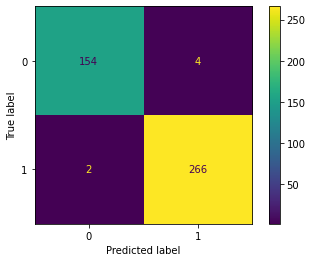

In [80]:
# create a confusion matrix for our logistic regression model fit on the scaled training data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_train_scaled, y_train)

<a id='more_metrics'></a>

## Accuracy/Precision/Recall/F_1 Score

We have a bunch of additional metrics, most of which we can figure out from the CM

### Question: Define accuracy. What is the accuracy score of our classifier?

In [87]:
#how correct our predictions are
#Confirm accuracy in code
#accuracy = (true positives + true negatives) / all observatiosn
accuracy = (266 + 2)/(266+2+4+154)

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [90]:
accuracy_score(y_train, y_hat_train)

0.9859154929577465

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_hat_train)

array([[154,   4],
       [  2, 266]], dtype=int64)

In [92]:
tn = confusion_matrix(y_train, y_hat_train)[0,0]
tp = confusion_matrix(y_train, y_hat_train)[1,1]
fp = confusion_matrix(y_train, y_hat_train)[0,1]
fn = confusion_matrix(y_train, y_hat_train)[1,0]

In [251]:
fn

2

In [250]:
fp

4

In [93]:
correct_preds = tp + tn
total_preds = tp + tn + fp + fn

correct_preds/total_preds

0.9859154929577465

### Question: Why might accuracy fail to be a good representation of the quality of a classifier?

#### your explanation here
- class imbalance and we care about the the small under represented class

### Question: Define recall. What is the recall score of our classifier?

In [96]:
# Confirm recall in code
#how often it correctly identifies a true positive
# recall = true positives/ number of actual true positives
266/(266+2)

0.9925373134328358

In [97]:
recall = tp/(tp+fn)
recall

0.9925373134328358

### Question: Define precision? What is the precision score of our classifier?

In [99]:
# Confirm precision in code
#what percentage of the our postiive predictions are correct
#precision = number of true positiives/ number of predicted positives
266/(266+4)

0.9851851851851852

In [102]:
precision = tp / (tp + fp)

### Question: Define f1 score? What is the f1 score score of our classifier?

In [103]:
# your explanation here
#combination of precision and recall
#f1 score = 2 * (precision * recall)/(precision + recall)

In [104]:
2*(precision*recall)/(precision+recall)

0.9888475836431226

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       158
           1       0.99      0.99      0.99       268

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426



<a id='auc_roc'></a>

## Auc_Roc

The AUC_ROC curve can't be deduced from the confusion matrix.  Describe what the AUC_ROC curve shows. 
Look [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) for some nice visualizations of AUC_ROC.

### Describe the AUC_ROC curve.  What does a good AUC_ROC curve look like? What is a good AUC_ROC score?

In [114]:
# your explanation here
#plots the true positive rate against the false positive rate
#a good auc_roc curve hugs the left side and top side of the graph.
# a good score is 1 as perfect classifier, ~.75 is good .5 is garbage
#roc tells us how our values (fpr and tpr) would change as we move along different thresholds
#defualt threshold is .5 for logistic regression

One of the advantages of logistic regression is that it generates a set of probabilities associated with each prediction.  What is the default threshold?  How would decrease or increasing your threshold affect true positive and false positive rates?


For our scaled X_train, generate an array of probabilities associated with the probability of the positive class.

In [118]:
# your code here
y_hat_trained_proba = lr.predict_proba(X_train_scaled)
y_hat_trained_proba
# left is probability of 0 and probability of 1 is on right sdide

array([[3.13192656e-05, 9.99968681e-01],
       [9.97136273e-01, 2.86372729e-03],
       [7.30392396e-04, 9.99269608e-01],
       [9.99996275e-01, 3.72508743e-06],
       [9.99998438e-01, 1.56225670e-06],
       [6.87592936e-01, 3.12407064e-01],
       [1.78880219e-04, 9.99821120e-01],
       [9.42932637e-01, 5.70673632e-02],
       [1.40867549e-04, 9.99859132e-01],
       [9.25542793e-06, 9.99990745e-01],
       [2.46012137e-02, 9.75398786e-01],
       [8.21706343e-04, 9.99178294e-01],
       [1.00000000e+00, 6.18453263e-13],
       [9.99886572e-01, 1.13427902e-04],
       [3.59905547e-05, 9.99964009e-01],
       [9.21976044e-03, 9.90780240e-01],
       [1.77623231e-05, 9.99982238e-01],
       [6.10891915e-08, 9.99999939e-01],
       [4.32816112e-04, 9.99567184e-01],
       [1.84288620e-04, 9.99815711e-01],
       [2.42911638e-03, 9.97570884e-01],
       [9.26619683e-01, 7.33803170e-02],
       [9.63772303e-04, 9.99036228e-01],
       [8.94753245e-04, 9.99105247e-01],
       [3.167009

In [120]:
y_hat_trained_proba_1 = lr.predict_proba(X_train_scaled)[:,1]
y_hat_trained_proba_1

array([9.99968681e-01, 2.86372729e-03, 9.99269608e-01, 3.72508743e-06,
       1.56225670e-06, 3.12407064e-01, 9.99821120e-01, 5.70673632e-02,
       9.99859132e-01, 9.99990745e-01, 9.75398786e-01, 9.99178294e-01,
       6.18453263e-13, 1.13427902e-04, 9.99964009e-01, 9.90780240e-01,
       9.99982238e-01, 9.99999939e-01, 9.99567184e-01, 9.99815711e-01,
       9.97570884e-01, 7.33803170e-02, 9.99036228e-01, 9.99105247e-01,
       6.83299028e-01, 9.99979683e-01, 1.74319982e-02, 9.81099838e-01,
       9.98772191e-01, 9.99150500e-01, 9.26665623e-01, 9.97609453e-01,
       9.66511224e-01, 1.20477289e-01, 9.63918963e-01, 9.97954196e-01,
       9.81301874e-01, 9.16866033e-01, 9.26851529e-01, 9.99556534e-01,
       1.11925633e-02, 1.92824524e-04, 4.27388391e-02, 4.92050840e-01,
       9.28192270e-01, 6.31052182e-03, 9.99001091e-01, 2.32228401e-07,
       9.90446033e-01, 9.98741496e-01, 9.99981203e-01, 9.99405499e-01,
       3.23840169e-02, 7.72854562e-01, 9.99907632e-01, 1.28940353e-06,
      

In [123]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_hat_trained_proba_1)


0.9972369166824107

Now, using those probabilities, create two arrays, one which converts the probabilities to label predictions using the default threshold, and one using a threshold of .4.  How does it affect our metrics?

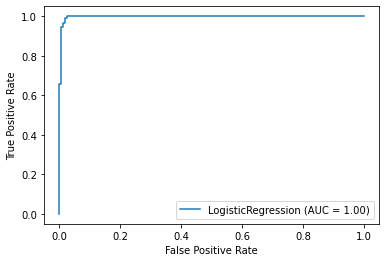

In [124]:
# Plot the AUC_ROC curve for our classifier
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train_scaled, y_train)

<a id='algos'></a>

In [126]:
def prob_threshold(array, threshold):
    zeros = []
    ones = []
    for x in array:
        if x[1] >= threshold:
            ones.append(1)
        else:
            zeros.append(0)
    return len(zeros), len(ones)

pp = lr.predict_proba(X_train_scaled)

prob_threshold(pp, .5), prob_threshold(pp, .4)


((156, 270), (154, 272))

# More Algorithms

Much of the sklearn syntax is shared across classifiers and regressors.  Fit, predict, score, and more are methods associated with all sklearn classifiers.  They work differently under the hood. KNN's fit method simply stores the training set in memory. Logistic regressions .fit() does the hard work of calculating coefficients. 

![lazy_george](https://media.giphy.com/media/8TJK6prvRXF6g/giphy.gif)

However, each algo also has specific parameters and methods associated with it.  For example, decision trees have feature importances and logistic has coefficients. KNN has n_neighbors and decision trees has max_depth.


Getting to know the algo's and their associated properties is an important area of study. 

That being said, you now are getting to the point that no matter which algorithm you choose, you can run the code to create a model as long as you have the data in the correct shape. Most importantly, the target is the appropriate form (continuous/categorical) and is isolated from the predictors.

Here are the algos we know so far. 
 - Linear Regression
 - Lasso/Ridge Regression
 - Logistic Regression
 - Naive-Bayes
 - KNN
 - Decision Trees
 
> Note that KNN and decision trees also have regression classes in sklearn.


Here are two datasets from seaborn and sklearn.  Let's work through the process of creating simple models for each.

In [217]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [218]:
penguins.dropna(inplace=True)

In [219]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

Question: What algorithm would be appropriate based on the target

In [220]:
# split target from predictors logistic regression
X = penguins.drop(['sex', 'species', 'island'], axis=1)
y = penguins['sex']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

For the first simple model, let's just use the numeric predictors.

In [222]:
# isolate numeric predictors
X_train_numeric = X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
X_train_numeric

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
321,55.9,17.0,228.0,5600.0
265,43.6,13.9,217.0,4900.0
36,38.8,20.0,190.0,3950.0
308,47.5,14.0,212.0,4875.0
191,53.5,19.9,205.0,4500.0
...,...,...,...,...
194,50.9,19.1,196.0,3550.0
77,37.2,19.4,184.0,3900.0
112,39.7,17.7,193.0,3200.0
277,45.5,15.0,220.0,5000.0


In [236]:
# Scale appropriately
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_numeric_x_train = ss.fit_transform(X_train_numeric)
X_test_scaled = ss.transform(X_test)

In [237]:
scaled_numeric_x_train = pd.DataFrame(scaled_numeric_x, index=X_train_numeric.index, columns=X_train_numeric.columns)

In [238]:
# instantiate appropriate model and fit to appropriate part of data.
lr1 = LogisticRegression()
lr1.fit(scaled_numeric_x_train, y_train)

LogisticRegression()

In [239]:
# Create a set of predictions

y_hat_train = lr1.predict(scaled_numeric_x_train)
y_hat_test = lr1.predict(X_test_scaled)


In [240]:
y_hat_test

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male'], dtype=object)

In [241]:
# Create and analyze appropriate metrics
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

      Female       0.90      0.84      0.87        45
        Male       0.83      0.90      0.86        39

    accuracy                           0.87        84
   macro avg       0.87      0.87      0.87        84
weighted avg       0.87      0.87      0.87        84



In [242]:
lr1_proba = lr1.predict_proba(X_test_scaled)[:,1]

In [243]:
from sklearn.datasets import load_boston
data = load_boston()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']

Question: What algorithm would be appropriate based on the target?

In [244]:
# split target from predictors
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

For the first simple model, let's just use the numeric predictors.

In [245]:
# isolate numeric predictors

In [246]:
# Scale appropriately
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [247]:
# instantiate appropriate model and fit to appropriate part of data.
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)

LinearRegression()

In [248]:
# Create a set of predictions

y_hat_train = lr2.predict(X_train_scaled)
y_hat_test = lr2.predict(X_test_scaled)


In [249]:
# Create and analyze appropriate metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat_test)

22.098694827097987